# Credit Card Fraud Detection - Logistic Regression

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3995,3637,-3.061576,-1.609474,1.266768,-0.188387,-1.378141,0.094377,0.527057,0.372759,1.746894,...,-0.298469,-0.583340,-0.388332,0.402433,-0.228393,0.730564,0.468322,-0.519314,437.17,0.0
3996,3637,1.171622,0.231544,0.674439,1.274870,-0.553417,-0.697918,-0.231447,-0.007440,1.408695,...,-0.163620,-0.350009,0.029405,0.394004,0.383792,-0.499815,-0.023091,0.006658,6.95,0.0
3997,3638,0.347370,-1.160738,1.011706,1.615779,-0.796071,1.240521,-0.421147,0.322980,1.813689,...,0.111878,0.029622,-0.258820,-0.322427,0.096853,-0.444063,0.011192,0.076735,360.46,0.0
3998,3638,-0.997800,1.099950,1.438566,-1.369962,0.364836,-0.419236,0.929917,-0.471805,1.588048,...,-0.346407,-0.399725,-0.139500,-0.446228,-0.185711,0.683184,-0.054256,-0.006615,37.96,0.0
3999,3639,-0.377328,0.606012,1.474296,-0.373168,0.551367,-0.602437,0.558113,-0.229391,1.134284,...,-0.319543,-0.729032,0.018198,-0.117900,-0.596078,-0.204930,-0.316321,-0.158255,1.98,0.0


In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   int64  
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,3998
1.0,2


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(3998, 31)
(2, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,3998.000000
mean,64.965003
std,213.096173
min,0.000000
25%,2.280000
50%,13.080000
75%,54.875000
max,7712.430000


In [11]:
fraud.Amount.describe()

,Amount
count,2.000000
mean,264.500000
std,374.059487
min,0.000000
25%,132.250000
50%,264.500000
75%,396.750000
max,529.000000


In [12]:
#counting number of fraud ang legit transactions
legit_count = legit['Class'].count()
fraud_count = fraud['Class'].count()

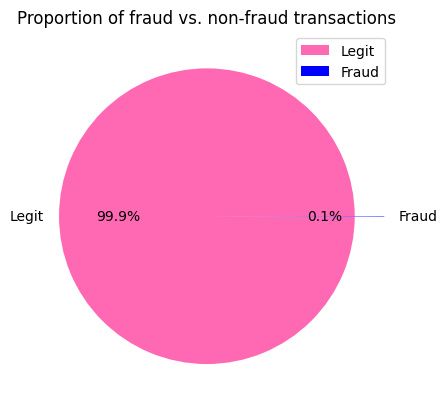

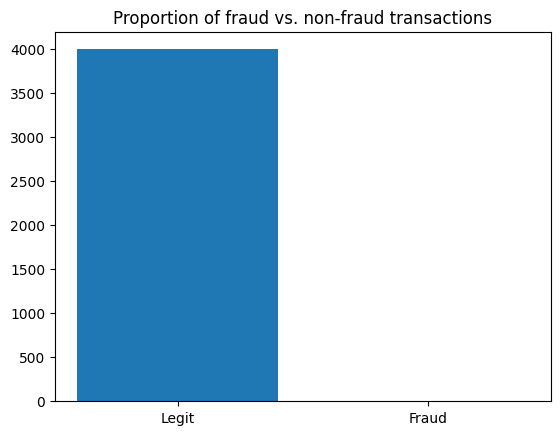

In [13]:
#plotting pie chart
import matplotlib.pyplot as plt
plt.pie([legit_count, fraud_count], labels = ['Legit', 'Fraud'], colors = ['hotpink', 'blue'], explode = [0, 0.2], autopct='%1.1f%%')
#explode separates two sectors, autopct displays percentage composition of data items
plt.legend()#displays legend
plt.title('Proportion of fraud vs. non-fraud transactions')#displays title
plt.show()
print()

#bar plot
plt.bar(['Legit', 'Fraud'],[legit_count, fraud_count]) #(x axis , y axis)
plt.title('Proportion of fraud vs. non-fraud transactions')
plt.show()
#this pie chart and bar pot show that the data is highly unbalanced, thus scaled it using log function

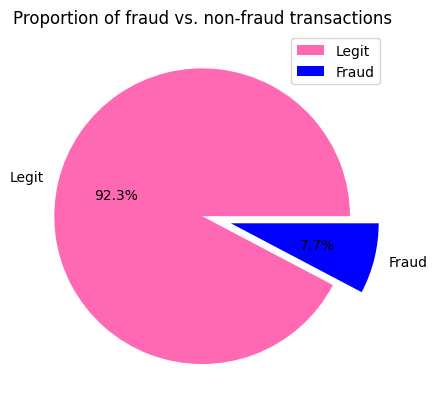

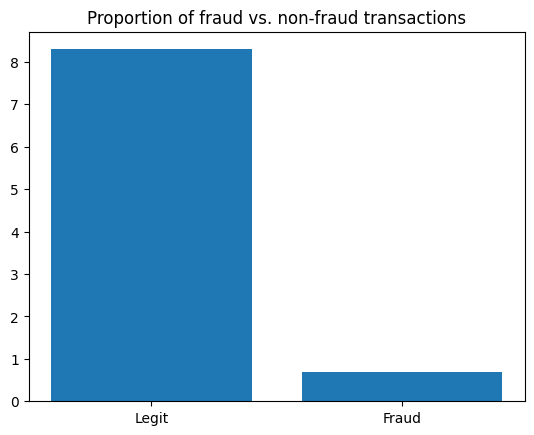

In [14]:
#scaling data
log_legit_count = np.log(legit_count)
log_fraud_count = np.log(fraud_count)

#plotting pie chart
plt.pie([log_legit_count, log_fraud_count], labels = ['Legit', 'Fraud'], colors = ['hotpink', 'blue'], explode = [0, 0.2], autopct='%1.1f%%')
#explode separates two sectors, autopct displays percentage composition of data items
plt.legend() #displays legend
plt.title('Proportion of fraud vs. non-fraud transactions') #displays title
plt.show()

print()

#plotting bar plot
plt.bar(['Legit', 'Fraud'],[log_legit_count, log_fraud_count]) #(x axis , y axis)
plt.title('Proportion of fraud vs. non-fraud transactions')
plt.show()

In [15]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1652.790895,-0.331647,0.308180,0.839827,0.015090,-0.028952,0.053751,0.146813,-0.071763,0.063828,...,0.058910,0.008930,-0.085439,-0.058608,0.028788,0.094629,-0.011728,0.044089,0.002472,64.965003
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [16]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3102,2663,-3.302742,1.813264,2.440079,3.581378,-2.116599,1.982720,-3.356776,-4.383284,0.105723,...,-2.463598,1.764780,-0.025978,0.992457,0.013968,0.399970,-0.340543,-0.495285,18.96,0.0
1849,1432,-0.572141,0.527346,2.855287,1.826879,-0.312457,1.447192,-0.318600,0.568257,-0.262654,...,-0.153491,-0.011273,-0.072697,0.107582,-0.480111,0.934986,0.123868,0.113106,3.60,0.0
3921,3521,-0.703141,0.210817,2.673559,0.545775,-0.219631,0.681348,0.016095,0.368615,0.414657,...,0.044562,0.282816,-0.132469,-0.036214,-0.159934,-0.439997,-0.025975,-0.116480,29.00,0.0
3019,2571,0.947919,-1.607478,0.216267,-2.631640,-1.075606,0.602969,-0.848789,0.316504,1.099302,...,-0.134236,0.230536,0.002686,-0.632420,0.214065,-0.639123,0.155571,0.041817,139.97,0.0
1663,1290,-1.268469,0.978275,0.155716,-1.894892,2.538569,3.553600,-0.273317,0.230785,0.170970,...,0.437036,-1.126361,-0.515761,1.032434,0.625130,0.459970,0.380890,0.183510,5.00,0.0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3258,2808,-0.970866,0.574654,1.001210,-2.160737,0.281339,-0.931407,0.883250,-0.148084,0.974477,...,0.099395,0.741881,-0.056372,0.198449,-0.003061,-0.835027,0.262792,-0.001307,1.00,0.0
3289,2834,1.250249,0.019063,-1.326108,-0.039059,2.232341,3.300602,-0.326435,0.757703,-0.156352,...,-0.009900,-0.189322,-0.157734,1.005326,0.838403,-0.315582,0.011439,0.018031,30.00,0.0
1251,966,1.189401,0.270214,0.401474,0.726123,-0.397897,-0.803702,-0.024969,-0.051676,0.098257,...,-0.245433,-0.705344,0.206217,0.343456,0.079239,0.105938,-0.010164,0.029444,1.98,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [20]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,2


In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1601.067073,-0.247632,0.264996,0.761727,0.101652,-0.090214,0.222582,0.106213,-0.094402,0.014995,...,0.011345,-0.017354,-0.104629,-0.064098,0.064133,0.118395,-0.007753,0.054581,0.019521,77.309106
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [22]:
#Applying Standard Normalisation for numerical data
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['Amount'])
    ]
)

In [23]:
transformed_amount = preprocessor.fit_transform(new_dataset)
transformed_amount

array([[-1.57445085e-01],
       [-1.98360002e-01],
       [-1.30701220e-01],
       [ 1.64893073e-01],
       [-1.94630778e-01],
       [-8.72823955e-02],
       [-1.53263027e-01],
       [-2.05312342e-01],
       [-1.48894507e-01],
       [ 4.65967535e-02],
       [ 1.10206664e-01],
       [-2.05285704e-01],
       [ 1.03440785e-01],
       [-2.67624141e-02],
       [-2.05285704e-01],
       [-2.05312342e-01],
       [ 5.62856188e-03],
       [ 6.50944173e-01],
       [-1.17142826e-01],
       [-2.05285704e-01],
       [-1.89995885e-01],
       [-1.75744921e-01],
       [-2.05285704e-01],
       [-8.34732593e-02],
       [-1.94950426e-01],
       [-2.00783998e-01],
       [-1.84002489e-01],
       [-1.89196766e-01],
       [-2.03181356e-01],
       [-2.04060388e-01],
       [ 1.81115198e-01],
       [-2.00783998e-01],
       [-1.02472783e-02],
       [ 1.33700776e-01],
       [-2.00837273e-01],
       [-7.47628571e-02],
       [ 2.56065487e-02],
       [-1.94630778e-01],
       [-6.1

Splitting the data into Features & Targets

In [24]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [25]:
print(X)

      Time        V1        V2        V3        V4        V5        V6  \
3102  2663 -3.302742  1.813264  2.440079  3.581378 -2.116599  1.982720   
1849  1432 -0.572141  0.527346  2.855287  1.826879 -0.312457  1.447192   
3921  3521 -0.703141  0.210817  2.673559  0.545775 -0.219631  0.681348   
3019  2571  0.947919 -1.607478  0.216267 -2.631640 -1.075606  0.602969   
1663  1290 -1.268469  0.978275  0.155716 -1.894892  2.538569  3.553600   
...    ...       ...       ...       ...       ...       ...       ...   
3258  2808 -0.970866  0.574654  1.001210 -2.160737  0.281339 -0.931407   
3289  2834  1.250249  0.019063 -1.326108 -0.039059  2.232341  3.300602   
1251   966  1.189401  0.270214  0.401474  0.726123 -0.397897 -0.803702   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

            V7        V8        V9  ...       V20       V21       V22  \
3102 -3.356776 -4.383284  0.105723  ..

In [26]:
print(Y)

3102    0.0
1849    0.0
3921    0.0
3019    0.0
1663    0.0
       ... 
3258    0.0
3289    0.0
1251    0.0
541     1.0
623     1.0
Name: Class, Length: 494, dtype: float64


Split the data into Training data & Testing Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(494, 30) (395, 30) (99, 30)


Model Training

Logistic Regression

In [29]:
model = LogisticRegression()

In [30]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(max_samples= 0.75, random_state= 42)

In [32]:
# Traning the model using Random Forest
model_RF.fit(X_train,Y_train)

RandomForestClassifier(max_samples=0.75, random_state=42)

In [33]:
# Making Predictions
Y_pred = model_RF.predict(X_test)
Y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Random Forest Model

In [34]:
# Issue - 44 : Implement Using Random Forest

# Importing the required library :
from sklearn.ensemble import RandomForestClassifier

# Applying the Random Forest Model :
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
from sklearn.ensemble import RandomForestClassifier
# Fitting the Training Set into the model :
rf.fit(X_train,Y_train)

# Making Predicitions using Random Forest Model of Evaluation
y_pred_rf = rf.predict(X_test)

# Printing the Predictions made :
print("Predicitons made using the Random Forest Model are as follows : ")
y_pred_rf


Predicitons made using the Random Forest Model are as follows : 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Model Evaluation

In [35]:
# Importing the required library :
from sklearn.model_selection import GridSearchCV

# In Addition, Adding the library to prevent the warning messages from being printed to the console :
import warnings
warnings.filterwarnings('ignore')

# Adding Hyperparameter Tuning with GridSearchCV for the Logisitc Regression Model :
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "saga"],  # Supported solvers
    "penalty": ["l2"],  # `l2` is compatible with all solvers above
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=7000), param_grid_lr, cv=5, scoring="accuracy")
grid_search_lr.fit(X_train, Y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy Score

In [36]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [38]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  1.0


In [ ]:
#VISUALISATION OF CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cmdt = pd.DataFrame(confusion_matrix(Y_test,X_test_prediction), index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
cmdt

SVM Model


In [42]:
# ISSUE 46 - Implement Using SVM :

from sklearn.svm import SVC

# Implementing SVM Model on the Dataset :
svm_model = SVC(probability=True)

# Training the model on the basis of Training Datasets :
svm_model.fit(X_train, Y_train)

# Predicting the results of the SVM Model :
Y_pred_svm = svm_model.predict(X_test)

# Displaying the predicted values :
print("Predicted Values : ", Y_pred_svm)

# Displaying the Accuracy Score of the SVM Model :
accuracy_svm = accuracy_score(Y_test, Y_pred_svm) * 100
print("SVM Model Accuracy : ", accuracy_svm, " % ")


Predicted Values :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
SVM Model Accuracy :  100.0  % 
